# **The Pothole Detection Dataset to Train YOLOv8**

**Let's check** `GPU`:

In [7]:
!nvidia-smi

Wed May 24 04:11:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Download POTHOLE dataset:**

In [8]:
!wget https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1 -O pothole_dataset_v8.zip


--2023-05-24 04:11:10--  https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip [following]
--2023-05-24 04:11:10--  https://www.dropbox.com/s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca54eb148e142098c46a04105fd.dl.dropboxusercontent.com/cd/0/get/B8pWbyne3HX5Ti4CX239Xfv3NqJPS1Z1paisZai4qR9zkWnURer7LSMX5lIQW6an4ITEMv3F-bgBqU_E3QuE7lFdM7XfYndtLbpNdEqUBBrLwctWEW4tr2kgCCnyi4TUVHVIVIHTax09lR-Q_bgoD6StE_wA550te_OzVy6nx7R_4ruRISEFGFkVBDYYaPKqG5o/file?dl=1# [following]
--2023-05-24 04:11:10--  https://uca54eb148e142098c46a04105fd.dl.dropboxusercontent.com/cd/0/get/B8pWbyne3HX5Ti4CX239Xfv3

**The dataset will be downloaded as `.zip file`, so let's `unzip` it:**

In [9]:
!unzip pothole_dataset_v8.zip

Streaming output truncated to the last 5000 lines.
  inflating: pothole_dataset_v8/train/images/Japan_009520.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009663.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009697.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009765.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009832.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009915.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009935.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010200.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010219.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010245.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010388.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010507.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010510.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010532.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_01

**Setting Up YOLOv8 to Train on Custom Dataset**

In [10]:
!pip install ultralytics # install 

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks() # check YOLO version

from ultralytics import YOLO # to work with Python later
from IPython.display import display, Image # Display images

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.3/78.2 GB disk)


**Do not want to be monitoring our deep learning experiments manually. So, use the ClearML integration, which Ultralytics YOLOv8 supports by default.**

In [12]:
!pip install clearml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00


**Train my data:**

In [14]:
!yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=/content/pothole_dataset_v8/pothole.yaml epochs=10 batch=8 name=yolov8n_custom plots = True


Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/pothole_dataset_v8/pothole.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

# **Python Version**

In [ ]:
# from ultralytics import YOLO
 

# model = YOLO('yolov8n.pt')
 

# results = model.train(
#    data='custom_data.yaml',
#    imgsz=640,
#    epochs=10,
#    batch=8,
#    name='yolov8n_custom'

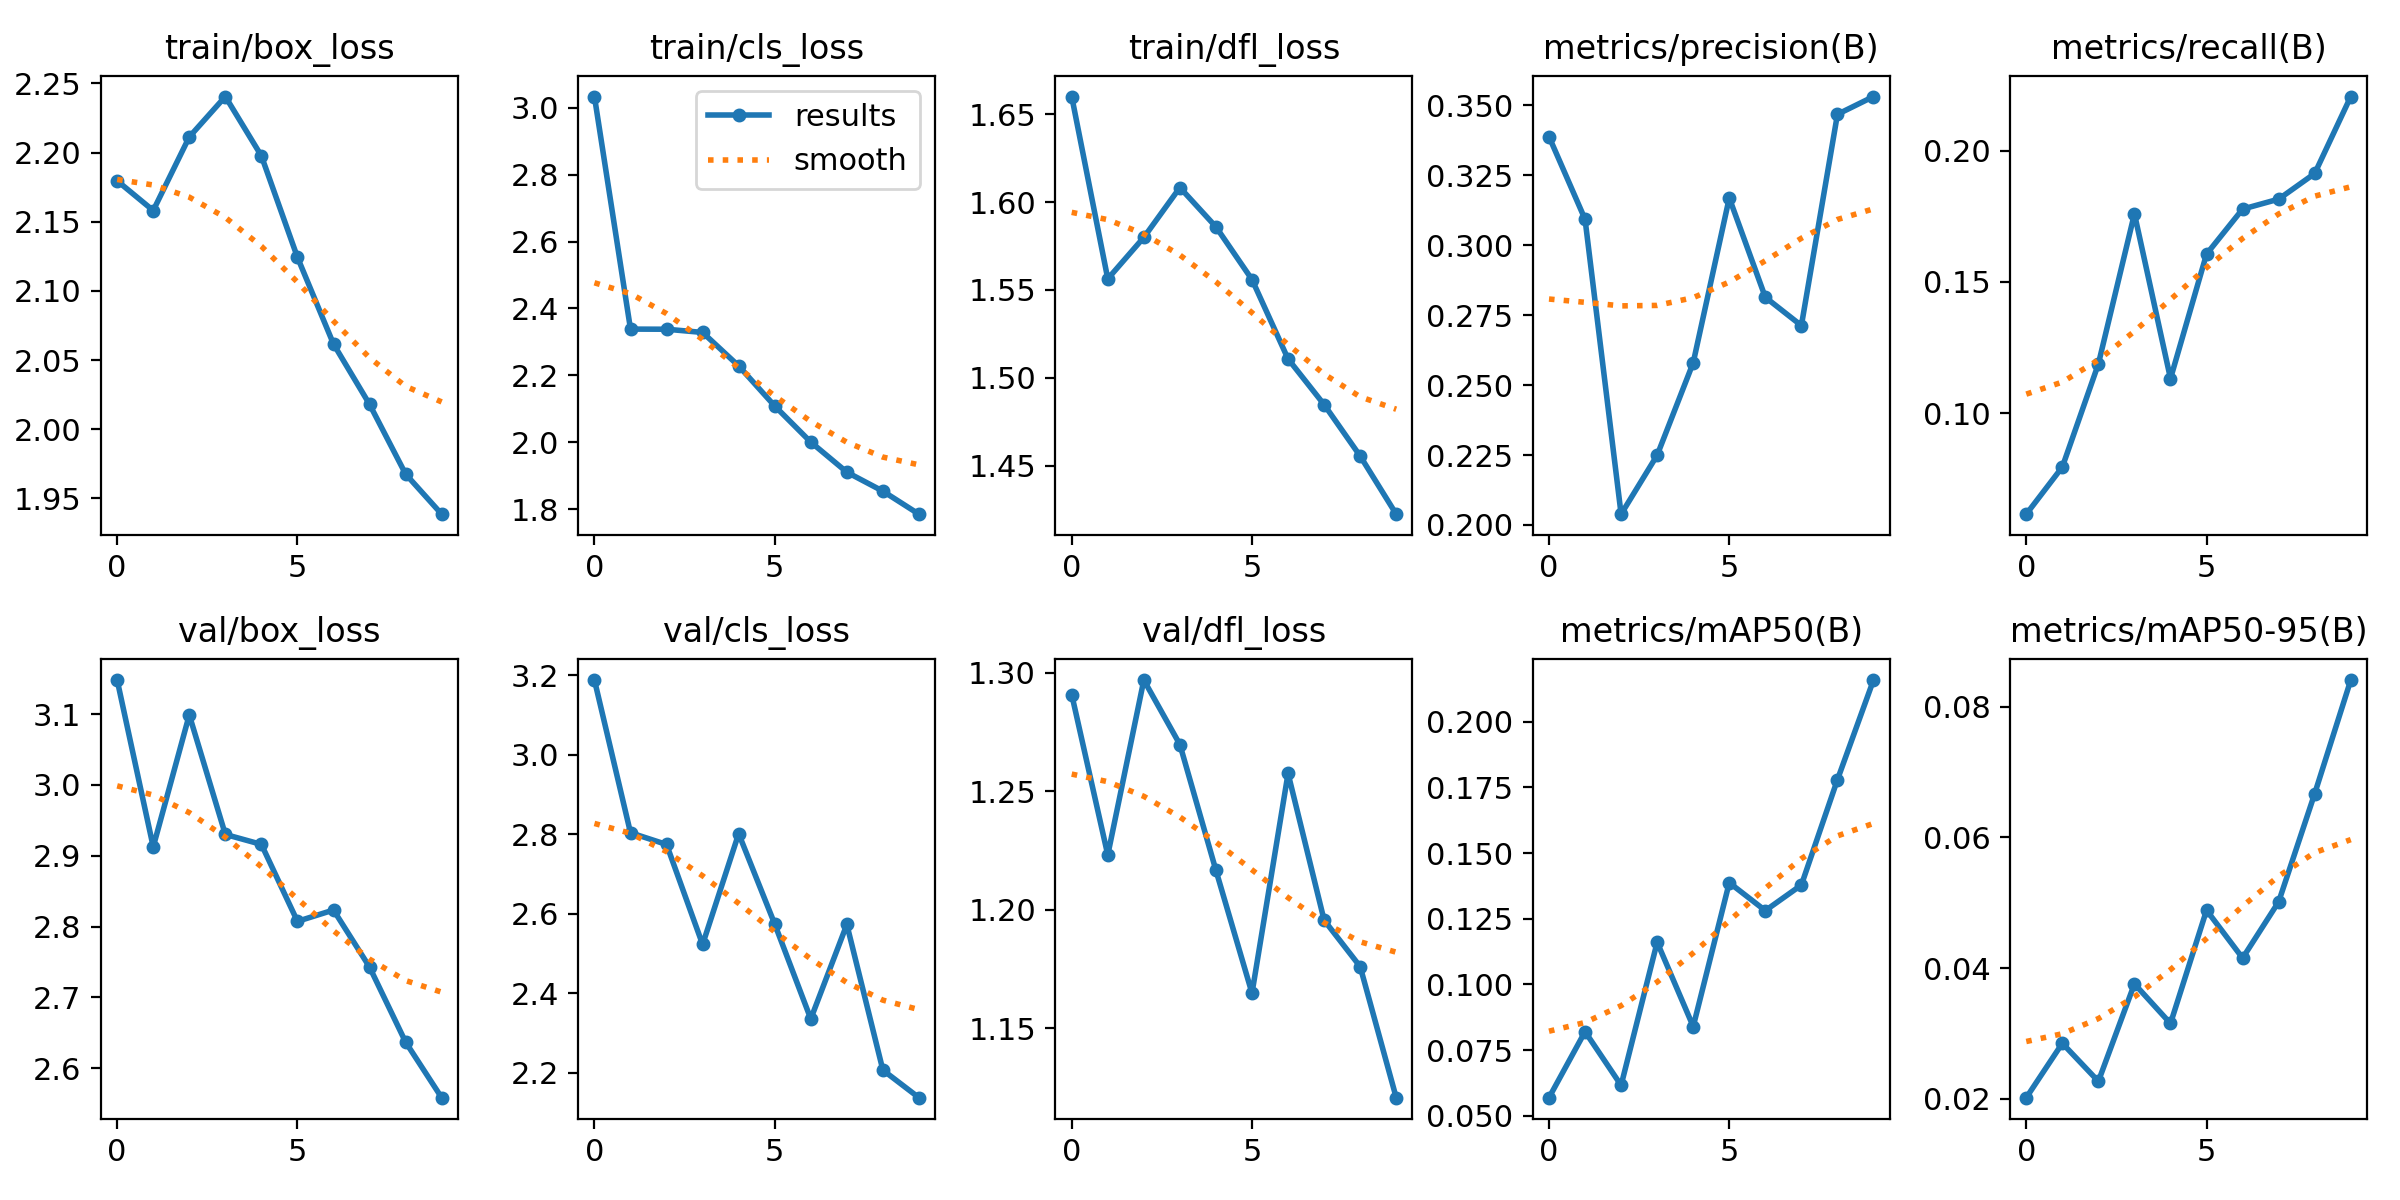

In [17]:
Image(filename = '/content/runs/detect/yolov8n_custom2/results.png', width = 800, height = 500)

# **Infrence:**

In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom2/weights/best.pt source=/content/pothole.mp4 show=True imgsz=1280 name=yolov8n_v8_50e_infer1280 hide_labels=True


WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

video 1/1 (1/1598) /content/pothole.mp4: 736x1280 2 potholes, 58.4ms
video 1/1 (2/1598) /content/pothole.mp4: 736x1280 2 potholes, 12.3ms
video 1/1 (3/1598) /content/pothole.mp4: 736x1280 2 potholes, 12.3ms
video 1/1 (4/1598) /content/pothole.mp4: 736x1280 1 pothole, 12.3ms
video 1/1 (5/1598) /content/pothole.mp4: 736x1280 1 pothole, 12.3ms
video 1/1 (6/1598) /content/pothole.mp4: 736x1280 1 pothole, 12.2ms
video 1/1 (7/1598) /content/pothole.mp4: 736x1280 2 potholes, 12.3ms
video 1/1 (8/1598) /content/pothole.mp4: 736x1280 1 pothole, 12.2ms
video 1/1 (9/1598) /content/pothole.mp4: 736x1280 3 potholes, 11.0ms
video 1/1 (10/1598) /con

Watch Result: /content/runs/detect/yolov8n_v8_50e_infer1280/pothole.mp4

